In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wine_df = pd.read_csv('http://bit.ly/wine_csv_data')

    이번엔 화이트 와인을 찾는 문제라고 하고 class(target)이 0,1 두가지 인것을 보니 white or non-white로 구분지어진것 같다. 책에서 0은 레드, 1은 화이트 라고 한다. 

In [6]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
wine_df.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

    이를 이용해서 이진 분류를 진행할 것인데 지금 배운 것 중 LinearRegression은 표준화가 필요하지 않다. 그럼 이를 LinearRegression을 이용할 것인가? 우리가 이전에 사용한 선형 회귀 문제는 훈련 데이터를 통한 예측이었다. 하지만 이것은 분류 분제 이므로 선형 회귀 말고 다른 문제를 이용하는 것이 용이해 보인다. 
    그러므로 일단 SS를 이용해 표준화를 진행해보자.

In [8]:
wine_input = wine_df[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine_df['class'].to_numpy()

In [9]:
#표준화를 진행하기 전에 train,test set 분리!
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_input,wine_target,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [12]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
lr.score(train_scaled,train_target),lr.score(test_scaled,test_target)

(0.7808350971714451, 0.7776923076923077)

In [14]:
lr.coef_, lr.intercept_

(array([[ 0.51270274,  1.6733911 , -0.68767781]]), array([1.81777902]))

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
dt.score(train_scaled,train_target), dt.score(test_scaled,test_target)

(0.996921300750433, 0.8592307692307692)

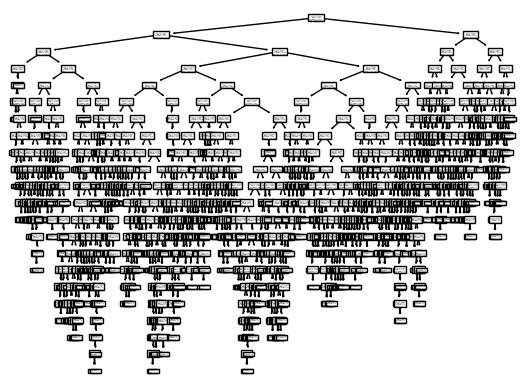

In [16]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(dt)
plt.show()

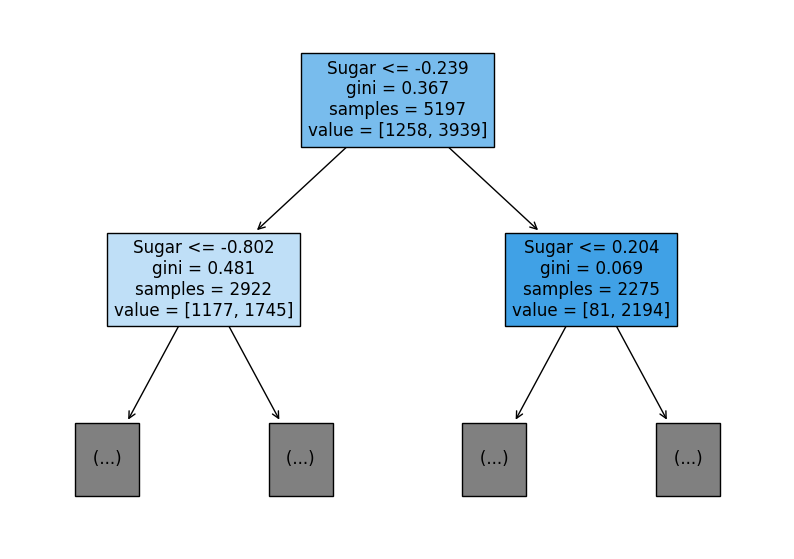

In [19]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['Alcohol','Sugar','pH'])
#filled=True로 지정하면 클래스 마다 색을 부여하고 어떤 클래스의 비율이 높아지면 높아질 수록 색이 진해집니다. 
plt.show()

    읽는 방법은 첫번째 줄은 테스트 조건, 두번째 줄은 불순도, 세번째 줄은 총 샘플 수, 네번째 줄은 클래스별 샘플 수 오른쪽이 조건 만족, 왼쪽이 불만족 
    이를 예측하는 것은 리프 노드 (맨 끝에 노드)에서 가장 많은 클래스가 예측 클래스가 됩니다. 

    만약 결정 트리를 회귀 문제에 적용하면 리프 노드에 도달한 샘플의 타깃을 평균하여 예측값으로 사용합니다. 사이킷런의 결정 트리 회귀모델은 DecisionTreeRegressor입니다.

#### Gini 불순도란?
    DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'입니다.
    criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것입니다. 
*지니 불순도의 식* <Br>
    지니불순도 = 1 - (음성클래스 비율^2 + 양성 클래스 비율^2)

    결정 트리 모델은 부모 노드오ㅓㅏ 자식노드의 술순도 차이가 가능한 크도록 트리를 성장 시킵니다.
    자식 노드의 불슨도를 샘플 개수에 비례하여 모두 더한 후 부모 노드의 불순도에서 빼면 됩니다. 
*정보 이득(부모와 자식 노드 사이의 불순도 차이) 공식*<br>
    부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도 = 정보 이득(Information Gain)

    DecisionTree의 노드는 지니 불순도를 사용한 정보 이득이 최대가 되도록 데이터를 나눈다.

    sklearn에서 이용하는 또 다른 불순도 기준에는 entropy가 있습니다.
    entropy를 통한 불순도 산출은 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱합니다.
*entropy 불순도 공식* <br>
    - 음성 클래스 비율 * log2(음성 클래스 비율) - 양성 클래스 비율 * log2(양성 클래스 비율) 

    일반적인 경우 지니 불순도와 엔트로피 불순도 결과의 차이는 크지 않다. 
    노드를 순수하게 나눌수록 정보 이득이 커진다.
    순수하게 나눈 노드 라는 것은 노드에 하나의 클래스만 모여있는 불순도 0인 경우를 일컫는 것이다. 

In [20]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
dt.score(train_scaled,train_target),dt.score(test_scaled,test_target)

(0.8454877814123533, 0.8415384615384616)

In [24]:
wine_df.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

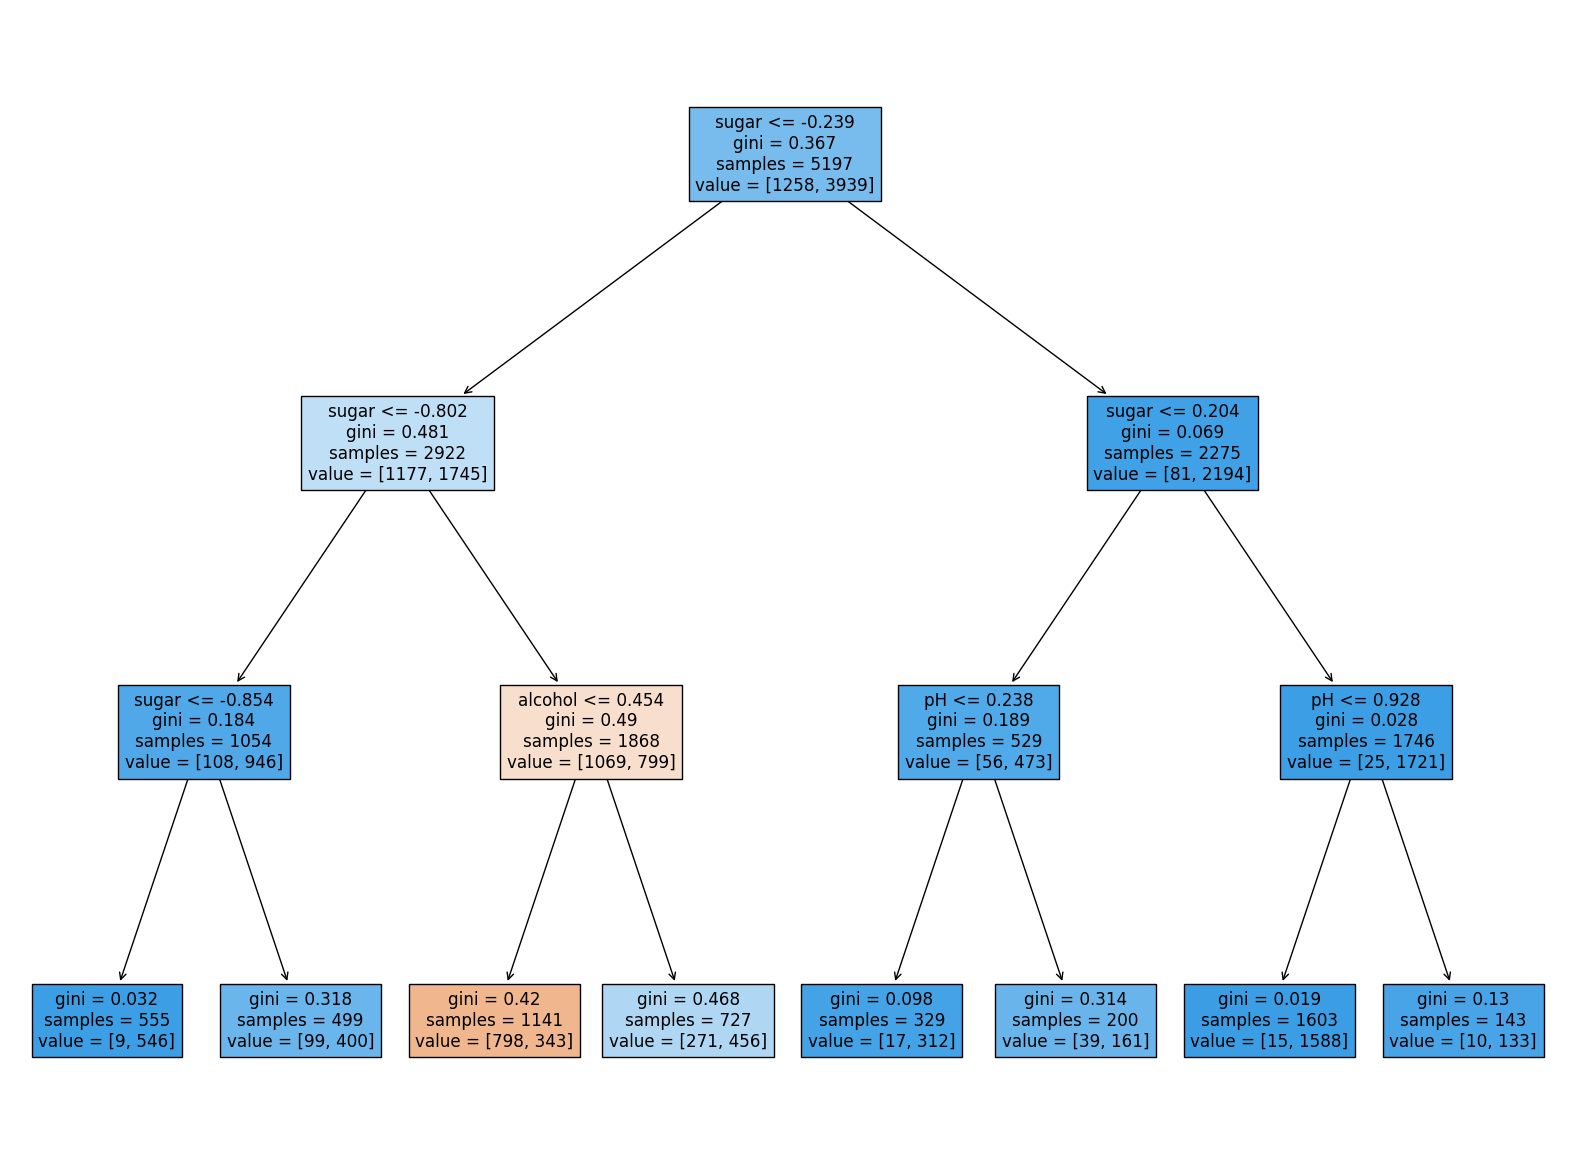

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol', 'sugar', 'pH'])
plt.show() 

    DecisionTree는 데이터 전처리 과정이 필요없다? 
    불순도를 기준으로 샘플을 나눌 것인데 불순도는 클래스별 비율을 가지고 계산하였습니다, 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특정 값의 스케일은 아무런 영향을 미치지 않기 때문에 표준화 전처리를 할 필요가 없습니다.

In [26]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
dt.score(train_input,train_target),dt.score(test_input,test_target)

(0.8454877814123533, 0.8415384615384616)

    scaled되었던 input을 통해 나온 결과와 동일한 결과를 보여준다는 것을 알 수 있다. 

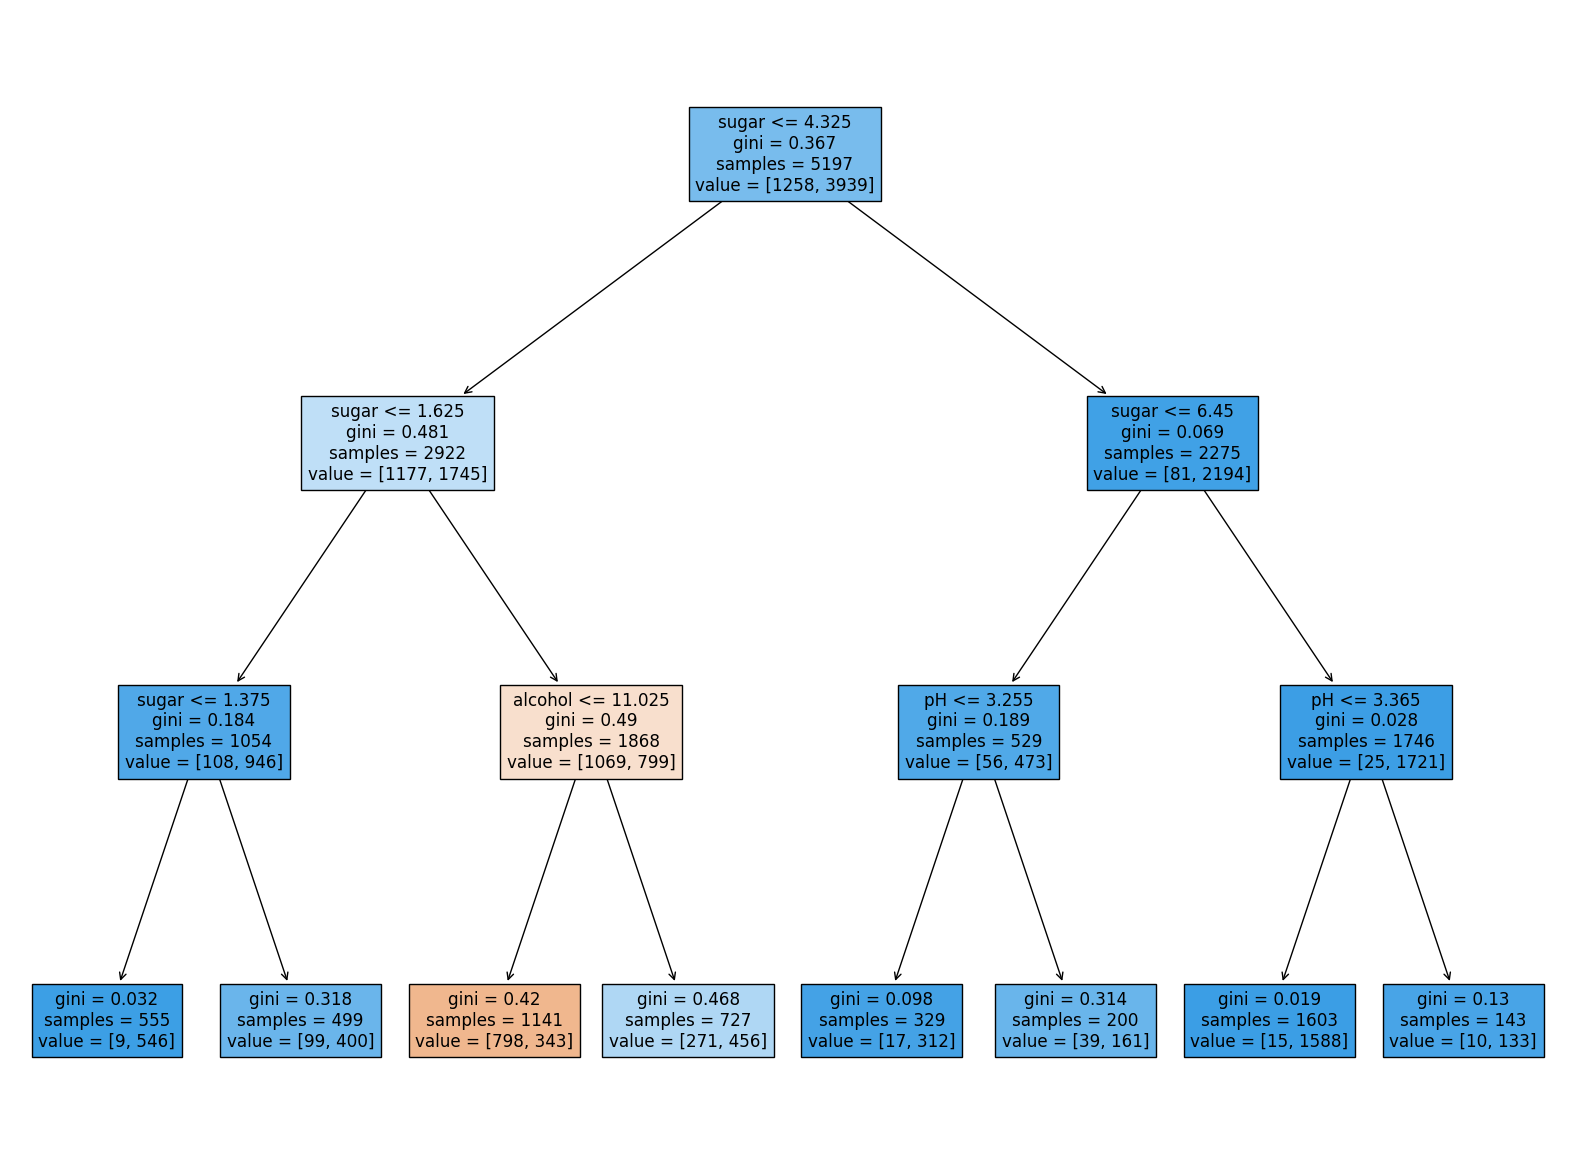

In [27]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol', 'sugar', 'pH'])
plt.show() 

    표준화 전처리가 되지 않은 데이터를 이용해 plot_tree를 볼 때 특성 값이 표준화 되지 않아서 좀 더 직관적으로 이해할 수 있다. 

In [30]:
#각 특성별로 무엇이 중요한지는 아래의 함수를 통해 볼 수 있다. 
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

In [33]:
wine_df
#에서 target데이터인 class를 빼고 세가지중 두번째인 sugar가 중요한 특성임을 알 수 있다. 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


---

0.8874350586877044
0.8615384615384616


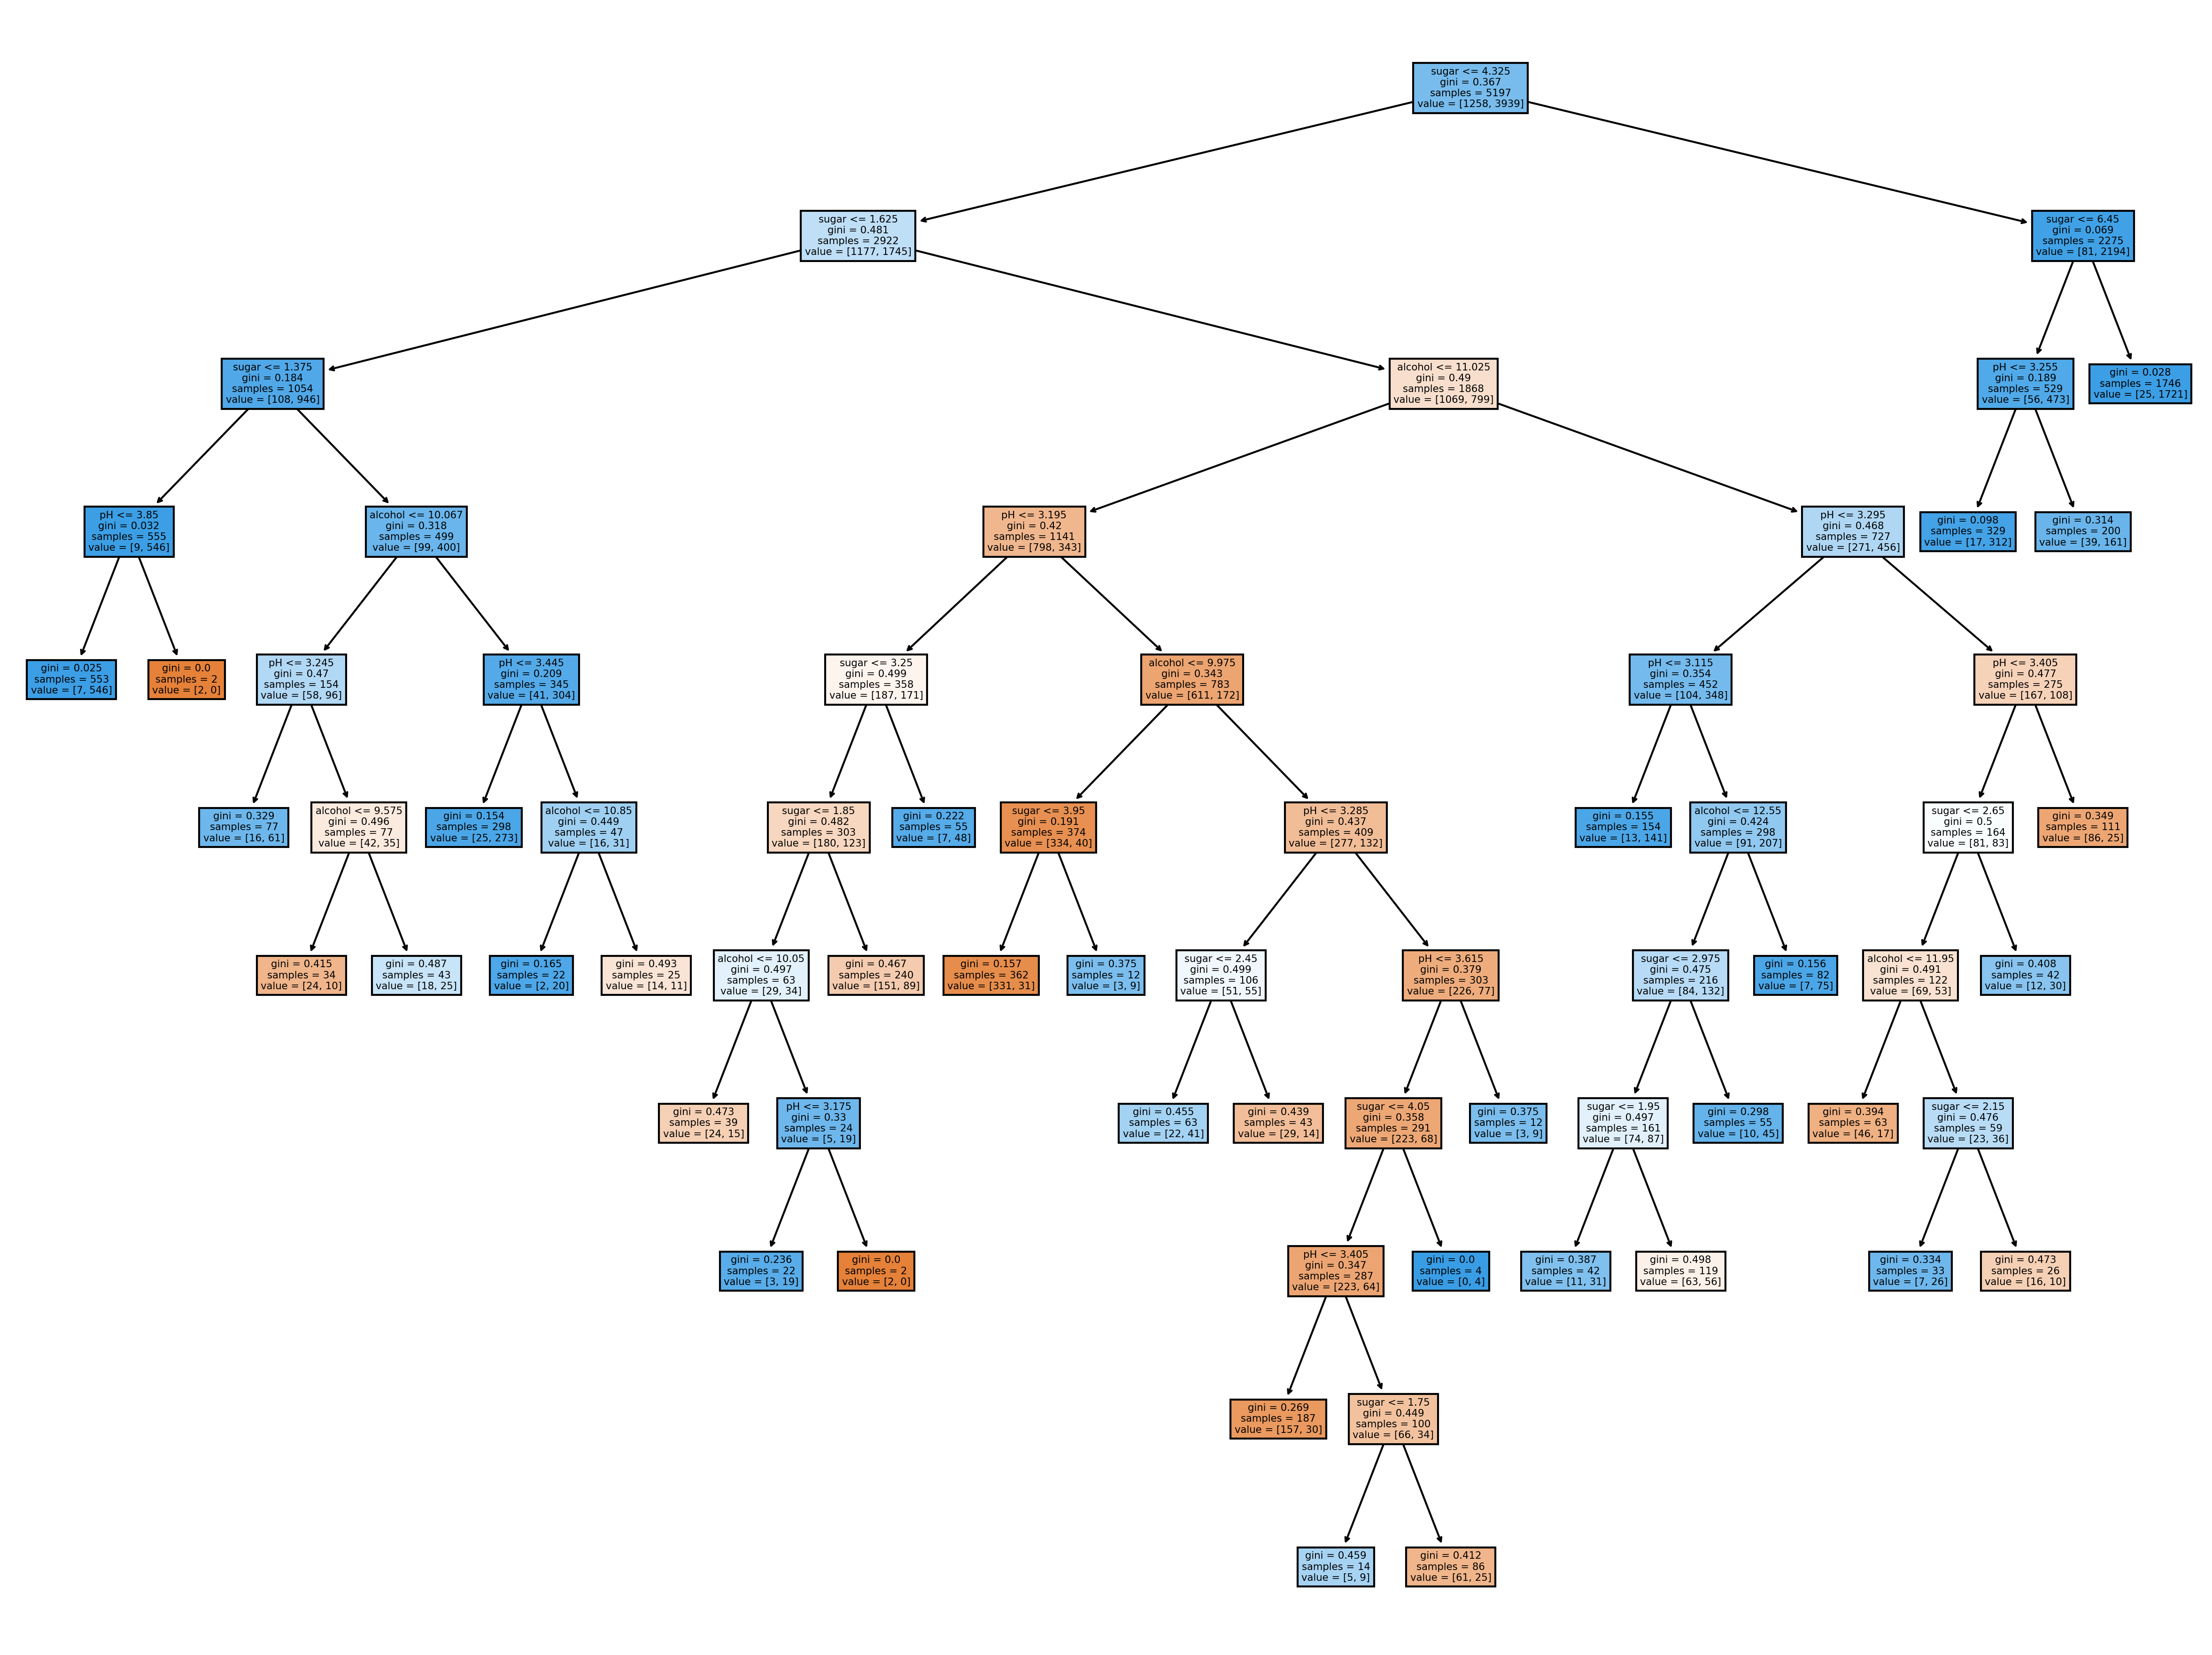

In [36]:
#연습문제
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))
plt.figure(figsize=(20,15),dpi=300)
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

---

### 교차 검증과 그리드 서치

    train,valid,test set을 각각 6:2:2 비율로 이용해 보아라! 

In [37]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(wine_input,wine_target,test_size=0.2,random_state=42)

In [47]:
sub_input,val_input,sub_target,val_target = train_test_split(train_input,train_target,test_size=0.25,)

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input,sub_target))#overfitting이다.
print(dt.score(val_input,val_target))

0.9971773158840134
0.8592307692307692


    K-폴드 교차 검증이란 훈련 세트를 k개로 나누어 교차 검증을 수행하는 것이다
    주로 5,10을 많이 사용한다. 늘어날 수록 검증 세트가 줄어들지만 각 폴드에서 계산한 검증 점수를 평균하기에 안정된 점수로 생각할 수 있다.

In [53]:
from sklearn.model_selection import cross_validate#검증 세트를 떼어내지 않고 훈련세트 전체를 cross validate에 넘기기
scores = cross_validate(dt,train_input,train_target)
scores

{'fit_time': array([0.0173285 , 0.0159986 , 0.01700401, 0.01818776, 0.01516199]),
 'score_time': array([0.00199962, 0.0009985 , 0.00200391, 0.00099897, 0.00204635]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

    fit_time : 모델을 훈련하는 시간
    score_time : 모델을 검증하는 시간
    test_score : 검증 폴드의 점수 이것을 평균하여 교차 검증의 최종 점수를 얻을 수 있다. 

In [56]:
np.mean(scores['test_score'])

0.855300214703487

    cross_validate는 섞어서 폴드를 나누지 않는다는 특징이 있다. 우리가 기존에 train_test_split을 통해 자동적으로 섞이기 때문에 괜찮지만 이를 이용하지 않는 경우에는 직접 splitter(분할기)를 통해 나누어줘야한다.
    cross_Validate는 회귀 모델의 경우에는 KFold를 분류 모델의 경우에는 StratifiedKFold를 사용합니다.

In [58]:
#훈련 세트를 섞은 후 10-폴드 교차 검증을 수행하는 코드 예시
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_validate(dt,train_input,train_target,cv=splitter)
scores

{'fit_time': array([0.02465773, 0.02064419, 0.02399993, 0.02200651, 0.01600075,
        0.01416922, 0.01327801, 0.01418781, 0.01316357, 0.01343155]),
 'score_time': array([0.00200105, 0.00100279, 0.0010066 , 0.00299454, 0.00265527,
        0.0009985 , 0.00101066, 0.00223446, 0.00100231, 0.        ]),
 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
        0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}

In [59]:
np.mean(scores['test_score'])

0.8574181117533719

#### 하이퍼파라미터 튜닝

    최적의 결과를 얻어내기 위해 파라미터를 튜닝할때 
    파라미터 각각의 최적 값을 찾는 것이 아니라 
    최적의 조합을 찾아야한다.

    이를 돕는 것이 그리드 서치(Grid Search)이다

In [60]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}

In [61]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=1)

    GridSearchCV의 cv매개변수의 기본 값은 5이므로 params의 5개 값이 있으므로 5개의 폴드당 5개의 파람을 비교해가며 확인하기 때문에 25개의 훈련을 합니다. 이 중 가장 좋은 결과의 모델을 best_estimator를 통해 바로 적용할 수 있습니다. 또한 best_params를 통해 매개변수도 확인 가능합니다

In [62]:
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [64]:
dt=gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9615162593804117
0.8653846153846154


In [65]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

    각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_['mean_test_score']를 통해 확인할 수 있습니다.

In [67]:
gs.cv_results_['mean_test_score']

array([0.86819297, 0.86453617, 0.86492226, 0.86780891, 0.86761605])

In [68]:
#numpy.argmax()를 통해 가장 큰 값의 인덱스를 추출할 수 있습니다.
best_index = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_index]

{'min_impurity_decrease': 0.0001}